# Work is By John David Maunder

#Part 1 - Visualize the Dataset

##Documenting the Steps for our Lab


The steps taken in this lab will be as follows: 

1.   Import the required libraries
2.   Seperate the data into testing and training sets for both the tensor values and the labels. We will also check to make sure they are the right size (50K train, 10K test of size 28X28)
3. Create a label classifier for our 10 categories
4. Plot the first 20 images in greyscale to make sure our data looks good. We can use matplot.plot() for this step
5. We will flatten the data into from a 28x28 2D vector into a 1D vector of size 784 for each of the 10 classes) We will be left with a new numpy array of shape (60,000 X 784)
6. We will use this Vector input as data for our logisitic regression model
7. We will train then test our logisitic regression model using this flattened data set.
8. We will then plot our training and testing "accuracy" and "loss" metrics 
9. We will repeat steps 7-9 but for our Deep Learning and CNN models (we will use a non flattened tensor input for our CNN model). 
10. For step 9 (training our Deep learning and CNN models) we will try out different architectures until we max out our accuracy score.
11. We will then compare all three models and determine which ones preformed the best and why 




In [157]:
#Importing our libraries 
#Keras will be used for our Deep Learning Model 
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import TensorBoard 
from tensorflow.keras.datasets import fashion_mnist

#Numpy will be used for our data strucutres 
import numpy as np
import matplotlib.pyplot as plt 

#We will use SkLearn for our linear/non Neural Network Model 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics


##Seperate Dataset into testing and Training 

In [126]:
#The next step is to inmport the dataset and to see the shape of the dataset

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
print('Fashion MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))
print(Y_train[0:20])



Fashion MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]


##Create a Classifier

In [189]:
#Create Class Labels for the different images in our Fashion Mnist dataset. We will use this list o plot our images 
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [128]:
# We want to normailize our pixels values to be between 0-1 to make our data "more clean" to use
X_train = X_train / 255.0 
X_test = X_test / 255.0

##Display Some Images From the Fashion MNIST dataset

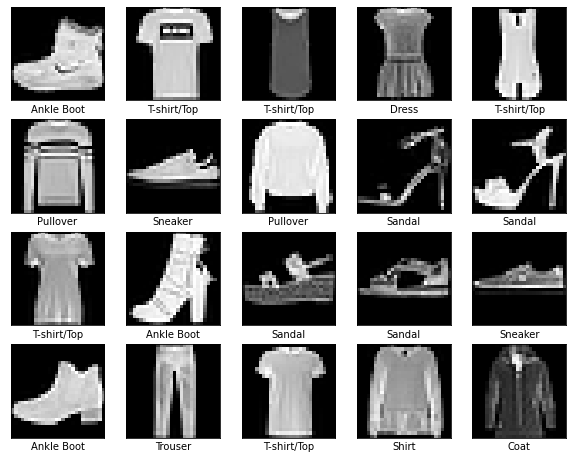

In [129]:
#We will display the first 20 images of our dataset 
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap="gray")
    plt.xlabel(class_names[Y_train[i]])
plt.show()

##Vectorizing/Flattening the Training and Testing Sets

In [130]:
#Print the shape of our original training and testing set 
print("This is the shape of our original Training and Testing Set:")
print('X_train: ' + str(X_train.shape))
print('X_test: ' + str(X_test.shape))
print("")

#We want to make a new variable since we want the original data to be user for our Convolutional Neural Network 
X_train_flattened = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test_flattened = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
print("This is the shape of our flattened testing and training set:")
print('X_train_flattened: ' + str(X_train_flattened.shape))
print('X_test_flattened: ' + str(X_test_flattened.shape))
print("")

print("This is to make sure our original testing set. This is printed to make sure our original data has not be altered:")
print('X_train: ' + str(X_train.shape))
print('X_test: ' + str(X_train.shape))

This is the shape of our original Training and Testing Set:
X_train: (60000, 28, 28)
X_test: (10000, 28, 28)

This is the shape of our flattened testing and training set:
X_train_flattened: (60000, 784)
X_test_flattened: (10000, 784)

This is to make sure our original testing set. This is printed to make sure our original data has not be altered:
X_train: (60000, 28, 28)
X_test: (60000, 28, 28)


#Part 2-Design three classifiers for the Fashion-MNIST dataset 

##Part A- Linear Classifier

In [166]:
from sklearn.utils import validation
linearmodel = LogisticRegression(random_state = 0, multi_class='multinomial', solver = "newton-cg", penalty = "l2")
model = linearmodel.fit(X_train_flattened,Y_train)

In [168]:
linearmodel.score(X_test_flattened, Y_test)

0.8442

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


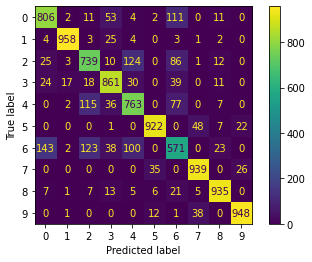

0 = T-shirt/Top
1 = Trouser
2 = Pullover
3 = Dress
4 = Coat
5 = Sandal
6 = Shirt
7 = Sneaker
8 = Bag
9 = Ankle Boot


In [195]:
plot_confusion_matrix(model, X_test_flattened,Y_test)
plt.show()
for i in range(len(class_names)):
  print(str(i ) + " = " + class_names[i])

##Part B- Deep Classifier


In [138]:
from tensorflow.python.ops.gen_nn_ops import relu
deepModel = keras.Sequential([keras.layers.Flatten(input_shape = (784,)),
                              keras.layers.Dense(128, activation =tf.nn.leaky_relu), 
                              keras.layers.Dense(64, activation= tf.nn.relu),
                              keras.layers.Dense(10, activation=tf.nn.softmax)])

In [139]:
deepModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss= "sparse_categorical_crossentropy",metrics = ["accuracy"])

In [141]:

training = deepModel.fit(X_train_flattened, Y_train, epochs=5, validation_data=(X_test_flattened, Y_test))

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5019 - accuracy: 0.8273 - val_loss: 0.5770 - val_accuracy: 0.7992
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4914 - accuracy: 0.8349 - val_loss: 0.5190 - val_accuracy: 0.8422
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5000 - accuracy: 0.8329 - val_loss: 0.5690 - val_accuracy: 0.8127
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4659 - accuracy: 0.8451 - val_loss: 0.5208 - val_accuracy: 0.8157
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4826 - accuracy: 0.8402 - val_loss: 0.5808 - val_accuracy: 0.8327


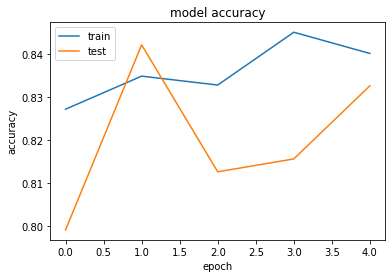

In [142]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

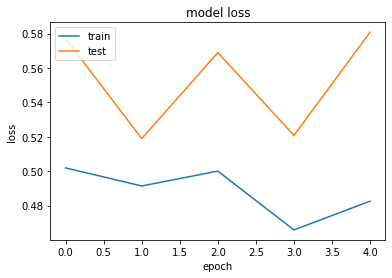

In [143]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [144]:
test_loss, test_accuracy = deepModel.evaluate(X_test_flattened, Y_test)
print("Test Accuracy: ", test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.5808 - accuracy: 0.8327
Test Accuracy:  0.8327000141143799


##Part C- Convolutional Neural Network

In [169]:
#Reshape the non labels values into a 4D tensor from a 3-D for our Neural Network Models 
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [170]:
cnn_model = keras.Sequential([
                              Conv2D(filters=32, kernel_size =3, activation="relu",input_shape= (28,28,1)),
                              MaxPooling2D(pool_size=2),
                               Conv2D(filters=64, kernel_size =3, activation="relu"),
                              MaxPooling2D(pool_size=2),
                              Dropout(0.2),
                              Flatten(),
                              Dense(32,activation = "relu"),
                              Dense(10, activation="softmax")])

In [171]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss= "sparse_categorical_crossentropy",metrics = ["accuracy"])

In [172]:
training = cnn_model.fit(X_train, Y_train, epochs= 5, validation_data=(X_test, Y_test))

Epoch 1/5
1875/1875 [==============================] - 58s 30ms/step - loss: 0.4976 - accuracy: 0.8158 - val_loss: 0.4206 - val_accuracy: 0.8445
Epoch 2/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.3941 - accuracy: 0.8538 - val_loss: 0.3704 - val_accuracy: 0.8642
Epoch 3/5
1875/1875 [==============================] - 57s 31ms/step - loss: 0.3666 - accuracy: 0.8641 - val_loss: 0.3630 - val_accuracy: 0.8700
Epoch 4/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.3593 - accuracy: 0.8666 - val_loss: 0.3783 - val_accuracy: 0.8580
Epoch 5/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.3553 - accuracy: 0.8692 - val_loss: 0.3561 - val_accuracy: 0.8705


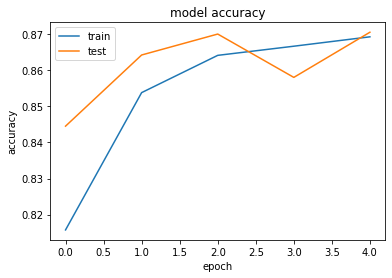

In [173]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

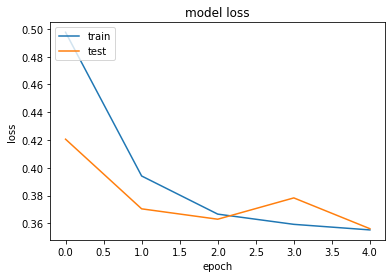

In [174]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [175]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, Y_test)
print("Test Accuracy: ", test_accuracy)

313/313 [==============================] - 3s 10ms/step - loss: 0.3561 - accuracy: 0.8705
Test Accuracy:  0.8705000281333923


#Part 3- Conclusion 

##It is indicated which classiifer worked better 

Based on the three accuracy scores shown above, the ranking of the models from best to worst are:

1.   The convolutional Neural Network 87.05%
2.   The logistic Regression Model 84.42%
3. Deep Neural Network Model 83.27%


##Hypothesis to why one classifer works better than the others

I believe the CNN model preformed the best because the CNN model can perform filtering (Conv2D) on images while the logistic regression and Deep Neural network models can’t. The filter layer is helpful because the filters produced in Keras can be used to detect edges and pattern within an image. In addition, the dropout and pooling layers in the CNN model also make the model more accurate since it allows the tensor image input to be downsized to a smaller image. This is useful since a smaller post-filtered image will have less data that the neurons need to focus on to be activated. This reduction in data will allow the model to focus on the local key features instead of background noise. 
I believe the Deep learning model preformed worse compared to the logistic regression model because the regression model was able to apply a “penalty” when training. This penalty input helped to better classify images since these penalties are used to prevent overfitting making our logistic regression model more accurate.


##Challeneges of buling a classifer:

The biggest challenges of building a classifier for a neural network is knowing how to best build your architecture of your model. There are no limits on how big a model can be, and there are no specifications on where you can put a certain layer (i.e a pooling layer before a Conv2D, or a Conv2D layer before a dropout layer). This essentially means that are an infinite number of models that you can build. For example, when I built my CNN in part 2C, I originally only had one Conv2D. After this, I changed my CNN model to have three Conv2D layers, then I changed my model again to only have two Conv2D. All these configurations ended up with different accuracy scores.  The reason they ended up with different accuracy scores is because the different filters and pooling sizes will feature different parts of the image depending on the inputs passed to these layers. This focus will cause certain images to be classified wrong if they have similar features.  For example, since the “Shirt” and “Coat” class have a similar design (both have long sleeves and take up most of the 28x28 image) it is very likely these images are mistaken for one another. 

What makes the MNIST Fashion dataset harder than the MNIST dataset:

The Fashion MNIST is harder to classify than the original MNIST dataset because of three things:


1.   Large images implies that more data needs to process, which can require 
more filtering to reduce background noise
2.   Numbers are distinct shapes (i.e a 1 looks different than a 9), whereas clothing can have similar shapes
3. What a piece of clothing can be classified as can be arbitrary. 

To expand on the above points, the difference between a sneaker and a sandal or a coat vs a long sleeve shirt can be based on texture or a small distinct feature in the clothing. Texture and small distinct features are not an issue for numbers.
When we plotted the first 20 images of the Fashion MNIST dataset, the last two images “Shirt” and “Coat” look very similar. They both have long sleeves, and both have similar shapes. The only major difference between these two images would be the coat would have a “darker” intensity value compared to the shirt. This is because the coat’s texture would be “rougher”. If we have coats in our dataset that are of a light colour or have a lighter fabric, it would be very likely that this coat could be classified as a Shirt. This same logic would apply to the Shirt and T-shirt/Top comparison since we can have three quarter length shirts. Lastly, the difference between sandals and sneakers can be minute. 	